In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, AlphaDropout, SpatialDropout2D, Cropping2D
from keras.constraints import maxnorm
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

Using TensorFlow backend.


In [2]:
# preprocessing
np.set_printoptions(threshold=20000)

# load data
image_data='train_images.npy'
label_data='train_labels.csv'

# images = np.load(image_data, encoding='latin1')
images = np.load(image_data, encoding='latin1')[:,1]
labels = np.loadtxt(label_data, dtype=str, encoding='latin1', delimiter=',')[1:,1]

In [3]:
# a=[]
# for i in range(len(images)):
#     image1 = (images[i][1]).reshape(100,100)
#     #plt.imshow(image1)
#     img = cv2.imwrite('temp.jpg',image1)
#     img = cv2.imread('temp.jpg',0)
#     edges = cv2.Canny(img, 0, 100)
#     #plt.imshow(edges)

#     im2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
#     cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:1]


#     mask=np.zeros(img.shape, np.uint8)
#     cv2.drawContours(mask, cnts, -1, (255),1)
#     a.append(mask)
#     #plt.imshow(mask)

In [4]:
# reshape X to "2d" form
# print(images[0])
# print(images.shape)
X = np.reshape(images.tolist(), (-1,100,100,1))
X = X.astype('float32')/255


# one-hot encoding for y
encoder=LabelEncoder()
encoder.fit(labels)
y_encoded = encoder.transform(labels)
y = keras.utils.to_categorical(y_encoded)

# shuffle(X,y)
# X = X[:1000]
# y = y[:1000]

In [5]:
model = Sequential()

model.add(Cropping2D(2, input_shape=(100,100,1)))
# model.add(Dropout(0.5))
model.add(Conv2D(16, 7, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(16, 5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.15))
# model.add(Conv2D(8, 3, padding='same', activation='relu'))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
# model.add(Conv2D(16, 3, padding='same', activation='relu'))
# model.add(Conv2D(16, 5, padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(Conv2D(16, 5, padding='same', activation='relu'))
# model.add(Conv2D(32, 5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.05))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.05))
model.add(Conv2D(16, 2, padding='same', activation='relu'))

# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(32, 2, padding='same', activation='relu'))

# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# model.add(Conv2D(64, 3, padding='same', activation='relu'))


# # model.add(Conv2D(128, 7, padding='same', activation='relu'))
# # model.add(Conv2D(128, 7, padding='same', activation='relu'))

# # model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Conv2D(64, 5, padding='same', activation='relu'))
# model.add(Conv2D(64, 5, padding='same', activation='relu'))
# model.add(Conv2D(64, 5, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.2))

# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# # model.add(Conv2D(128, 3, padding='same', activation='relu'))
# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.2))

# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))

# model.add(Conv2D(256, 2, padding='same', activation='relu'))

model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(31, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_1 (Cropping2D)    (None, 96, 96, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 16)        800       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 16)        6416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
__________

In [6]:
model.fit(X, y, validation_split=0.2, epochs=40, batch_size=16)


Train on 8000 samples, validate on 2000 samples
Epoch 1/40
8000/8000 [==============================] - 6s 707us/step - loss: 3.3907 - acc: 0.0510 - val_loss: 3.3866 - val_acc: 0.0575
Epoch 2/40
8000/8000 [==============================] - 4s 454us/step - loss: 3.3819 - acc: 0.0540 - val_loss: 3.3862 - val_acc: 0.0505
Epoch 3/40
8000/8000 [==============================] - 4s 452us/step - loss: 3.2533 - acc: 0.0696 - val_loss: 3.0746 - val_acc: 0.0955
Epoch 4/40
8000/8000 [==============================] - 4s 452us/step - loss: 2.9932 - acc: 0.1126 - val_loss: 2.8791 - val_acc: 0.1455
Epoch 5/40
8000/8000 [==============================] - 4s 454us/step - loss: 2.8339 - acc: 0.1589 - val_loss: 2.7492 - val_acc: 0.1830
Epoch 6/40
8000/8000 [==============================] - 4s 453us/step - loss: 2.7162 - acc: 0.1891 - val_loss: 2.6392 - val_acc: 0.2220
Epoch 7/40
8000/8000 [==============================] - 4s 452us/step - loss: 2.5209 - acc: 0.2427 - val_loss: 2.4317 - val_acc: 0.2695


In [7]:
scores1 = model.evaluate(X, y, verbose=0)
print("Test Loss: %.2f%%" % (scores1[0]*100))
print("Test Accuracy: %.2f%%" % (scores1[1]*100))

Test Loss: 116.46%
Test Accuracy: 65.47%


In [8]:
model.save("model.h5")

TypeError: 'AxesSubplot' object does not support indexing

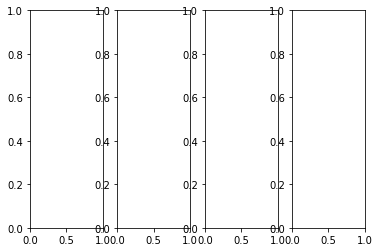

In [9]:
f, axarr = plt.subplots(1, 4)
f.subplots_adjust(hspace=0.5)

for i in range(4):
    axarr[0][i].imshow(np.reshape(X[i],(100,100)), cmap='hot', interpolation='nearest')